<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [125]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [126]:
# importar o arquivo listings.csv para um DataFrame
link_db = 'http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-12-29/visualisations/listings.csv'
df = pd.read_csv(filepath_or_buffer = link_db, index_col = 'id')
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,21143,3,33,2022-12-19,0.26,1,309,6,NaN
14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,5728,7,102,2022-12-05,0.80,4,305,11,NaN
317484,Single Room in Palermo Soho,1621752,Luba,NaN,Palermo,-34.589920,-58.422360,Private room,3348,2,160,2022-12-10,1.22,4,349,5,NaN
15074,ROOM WITH RIVER SIGHT,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,5286,29,0,NaN,NaN,1,365,0,NaN
118070,Amazing view - GREAT Studio - Balcony,530261,Luciano,NaN,Palermo,-34.583110,-58.427670,Entire home/apt,10572,14,49,2022-07-22,0.36,27,349,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789876010794026163,Mono ambiente vista panorámica,161559109,Juan,NaN,Caballito,-34.608729,-58.460363,Entire home/apt,6080,1,0,NaN,NaN,18,331,0,NaN
791445322793116711,Departamento recoleta amplio.,154496179,Ramiro,NaN,Recoleta,-34.590495,-58.400738,Entire home/apt,7048,3,0,NaN,NaN,1,364,0,NaN
789883094728711215,Palermo Ápt bohemia,60115955,Hache,NaN,Palermo,-34.584193,-58.440578,Entire home/apt,2114,4,0,NaN,NaN,15,342,0,NaN


## Análise dos Dados


**Dicionário das variáveis**

* `name`: nome do imóvel
* `host_id`: id do proprietário ou administrador do imóvel
* `host_name`: nome do proprietário ou administrador do imóvel
* `neighbourhood_group`: sem dados categóricos
* `neighbourhood`: bairro do imóvel 
* `latitude`: coordenada da latitude do imóvel
* `longitude`: coordenada da longitude do imóvel
* `room_type`: variável categórica do tipo de imóvel
* `price`: preço pago no aluguel do imóvel
* `minimum_nights`: quantidade mínima de noites para alugar o imóvel
* `number_of_reviews`: quantidade de avaliações dos hóspedes
* `last_review`: data da última avaliação
* `reviews_per_month`: quantidade de avaliações por mês
* `calculated_host_listings_count`: quantidade de imóveis do proprietário ou administrador
* `availability_365`: período em dias disponível no ano 
* `number_of_reviews_ltm`: 
* `license`: se o imóvel possui alguma licença específica 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [127]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,21143,3,33,2022-12-19,0.26,1,309,6,NaN
14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,5728,7,102,2022-12-05,0.80,4,305,11,NaN
317484,Single Room in Palermo Soho,1621752,Luba,NaN,Palermo,-34.58992,-58.42236,Private room,3348,2,160,2022-12-10,1.22,4,349,5,NaN
15074,ROOM WITH RIVER SIGHT,59338,Monica,NaN,Nuñez,-34.53892,-58.46599,Private room,5286,29,0,NaN,NaN,1,365,0,NaN
118070,Amazing view - GREAT Studio - Balcony,530261,Luciano,NaN,Palermo,-34.58311,-58.42767,Entire home/apt,10572,14,49,2022-07-22,0.36,27,349,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [128]:
# identificar o volume de dados do DataFrame
linhas = df.shape[0]
colunas = df.shape[1]
print(f'O DataFrame possui {linhas} entradas e {colunas} variáveis, visto que o id está sendo usado como índice.')

# verificar os tipos de cada variável no dataset
display(df.dtypes)

O DataFrame possui 20085 entradas e 17 variáveis, visto que o id está sendo usado como índice.


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [129]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/linhas).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.979437
last_review                       0.190739
reviews_per_month                 0.190739
name                              0.000149
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
host_name                         0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

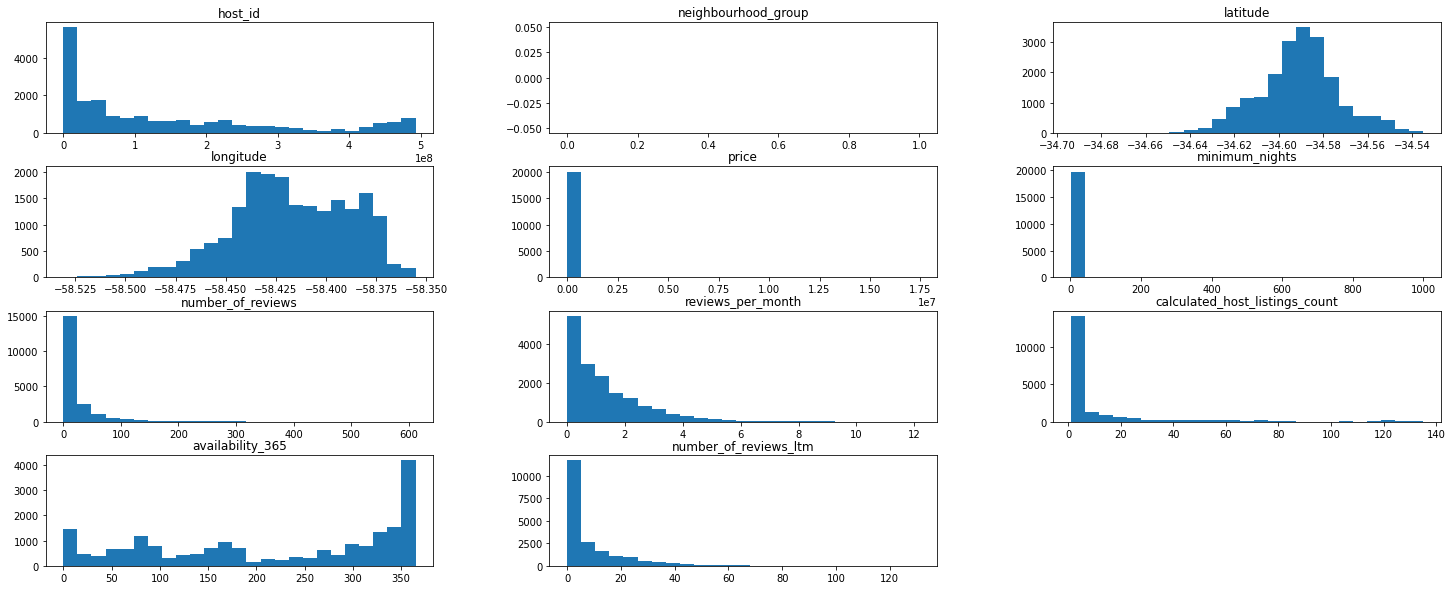

In [130]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 25, figsize = (25,10), grid = False);

### **Q4. Qual a média dos preços de aluguel?**

In [148]:
# ver a média da coluna `price`
price_avg = df['price'].mean()
print('A média dos valores de aluguel é {:.2f}'.format(price_avg))

A média dos valores de aluguel é 16443.69


### **Q5. Qual a correlação existente entre as variáveis**

In [132]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.011432,-0.011099,-0.012009,0.007430,0.000924,-0.015212
minimum_nights,0.011432,1.000000,-0.053721,-0.104573,-0.022940,0.012340,-0.102937
number_of_reviews,-0.011099,-0.053721,1.000000,0.264509,-0.051439,-0.053766,0.627381
reviews_per_month,-0.012009,-0.104573,0.264509,1.000000,0.079032,0.083731,0.582870
calculated_host_listings_count,0.007430,-0.022940,-0.051439,0.079032,1.000000,0.023111,0.039768
availability_365,0.000924,0.012340,-0.053766,0.083731,0.023111,1.000000,-0.006425
number_of_reviews_ltm,-0.015212,-0.102937,0.627381,0.582870,0.039768,-0.006425,1.000000


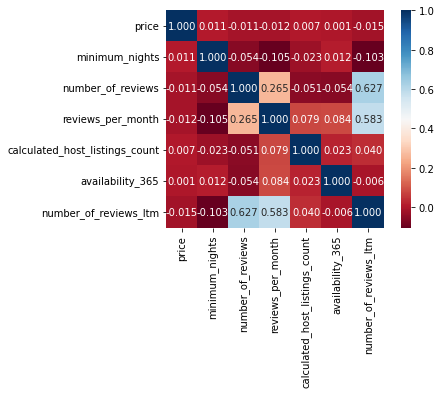

In [133]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [134]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    17823
Private room        1996
Shared room          160
Hotel room           106
Name: room_type, dtype: int64

In [135]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/linhas

Entire home/apt    0.887379
Private room       0.099378
Shared room        0.007966
Hotel room         0.005278
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



In [136]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Coghlan          283059.373134
Almagro           23002.757880
Puerto Madero     22947.046875
Barracas          22623.144828
Monte Castro      20410.000000
Retiro            20027.680612
Boca              19648.305556
Monserrat         19081.483117
Palermo           18563.411396
San Cristobal     16434.134615
Name: price, dtype: float64

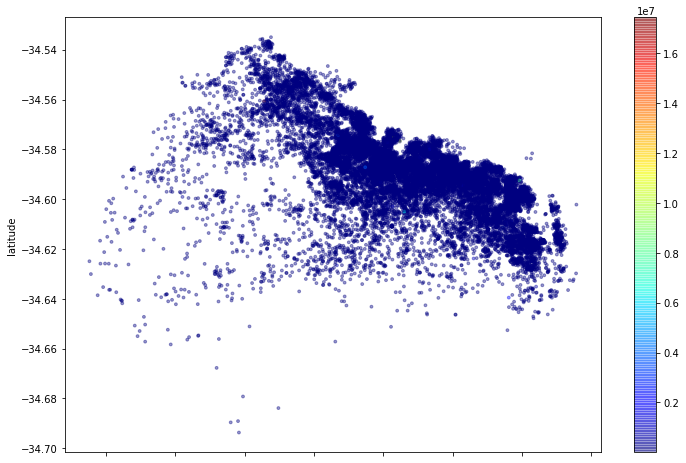

In [137]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

neighbourhood
Monte Castro        14.400000
Saavedra            12.709677
Belgrano            12.378593
Parque Chacabuco    12.000000
Paternal            11.387097
Almagro              9.734957
Caballito            9.442105
Villa Real           8.333333
Villa Urquiza        7.974576
Retiro               7.897959
Name: minimum_nights, dtype: float64

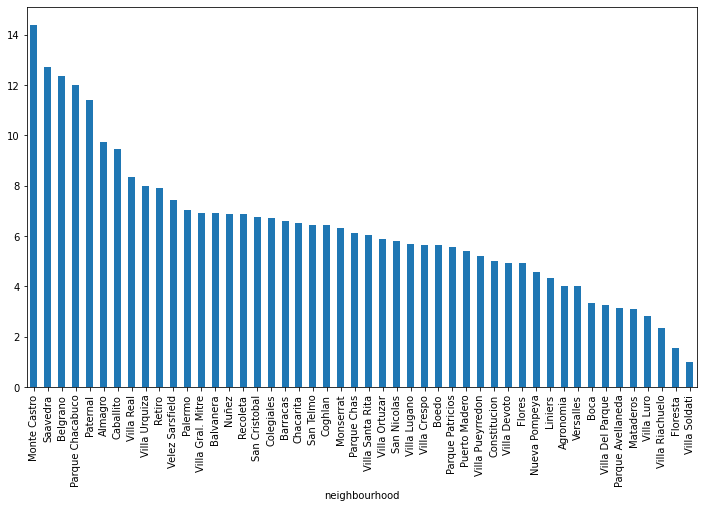

In [151]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

# pegando a média por bairro
display(df.groupby(['neighbourhood'])['minimum_nights'].mean().sort_values(ascending = False)[:10])
df.groupby(['neighbourhood'])['minimum_nights'].mean().sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 7));

### **Q9. Como é a distruibuição dos imóveis na cidade quanto ao tipo anunciado?**

Para fazer essa análise, precisamos transformar a variável `room_type` em categórica, ao invés de numérica. Para isso, faremos a seguinte transformação:
* Entire home/apt = **1** </br>
* Private room = **2** </br>
* Shared room = **3** </br>
* Hotel room = **4** </br>

In [139]:
# transformando o tipo da variável 'type_room' para numérica
df['room_type_num'] = df['room_type'].replace(['Entire home/apt','Private room','Shared room','Hotel room'],[1,2,3,4])

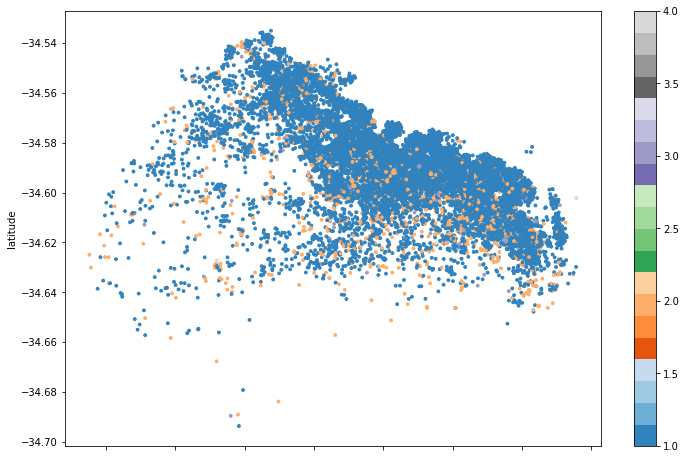

In [143]:
# plotando os imóveis pela latitude e longitude considerando a estratificação de tipo de quarto
df.plot(kind="scatter", x='longitude', y='latitude', alpha=1, c=df['room_type_num'], s=8, cmap=plt.get_cmap('tab20c'), figsize=(12,8));

In [141]:
# criando a coluna com a média de aluguel
media_aluguel_bairro = df.groupby(['neighbourhood']).price.mean()
media_aluguel_bairro.index
df['price_avg'] = df.neighbourhood.replace(media_aluguel_bairro.index,media_aluguel_bairro)
df['price_avg']

id
11508                 18563.411396
14222                 18563.411396
317484                18563.411396
15074                 11667.228571
118070                18563.411396
                          ...     
789876010794026163    10806.584211
791445322793116711    14134.450923
789883094728711215    18563.411396
789886886364996844    19081.483117
789889818985355570    12514.528246
Name: price_avg, Length: 20085, dtype: float64

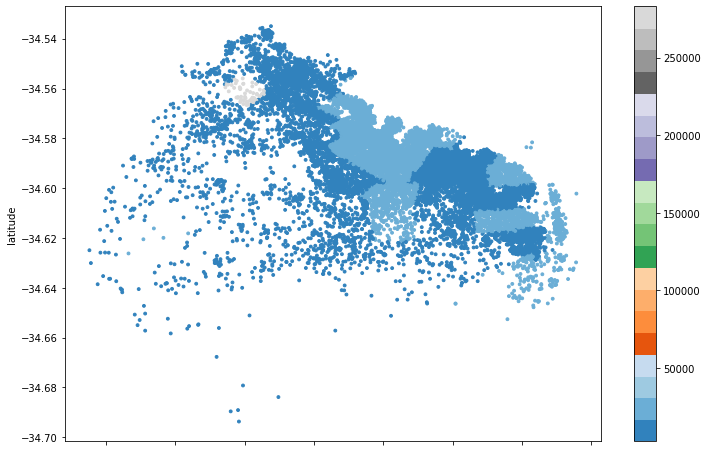

In [142]:
# plotando os imóveis pela latitude e longitude considerando a estratificação de tipo de quart
df.plot(kind="scatter", x='longitude', y='latitude', alpha=1, c=df['price_avg'], s=8, cmap=plt.get_cmap('tab20c'), figsize=(12,8));

## Conclusões


A análise exploratória do conjunto de dados do Airbnb mostra que o _dataset_ utilizado no estudo possui outliers em diversas variáveis, o que demandará, em uma próxima análise, o estudo profundo sobre cada uma das distribuições para adequar esses modelos.

Além disso, na cidade de Buenos Aires há uma discrepância muito grande entre a quantidade de casas/apartamentos para serem alugados e entre os demais, o que pode sugerir o estudo separado de cada um desses tipos.

Outro ponto interessante é que o bairro de Coghlan possui uma média de valor de aluguel ligeiramente mais alta que as demais regiões da cidade.

Vale ressaltar que esse conjunto de dados é uma versão resumida, ideal para uma análise inicial.